# GemPy Paper Code: Model and Topology

In this notebook you will be able to see and run the code utilized to create the figures of the paper *GemPy - an open-source library for implicit geological modeling and uncertainty quantification*

In [3]:
# Importing dependencies

# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

import gempy as gp
%matplotlib inline

# Aux imports

import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

In [4]:
# Funtion to plot labels of the input data in latex
def annotate_plot(frame, label_col, x, y, **kwargs):
    """
    Annotate the plot of a given DataFrame using one of its columns

    Should be called right after a DataFrame or series plot method,
    before telling matplotlib to show the plot.

    Parameters
    ----------
    frame : pandas.DataFrame

    plot_col : str
        The string identifying the column of frame that was plotted

    label_col : str
        The string identifying the column of frame to be used as label

    kwargs:
        Other key-word args that should be passed to plt.annotate

    Returns
    -------
    None

    Notes
    -----
    After calling this function you should call plt.show() to get the
    results. This function only adds the annotations, it doesn't show
    them.
    """
    import matplotlib.pyplot as plt  # Make sure we have pyplot as plt

    for label, x, y in zip(frame[label_col], frame[x], frame[y]):
        plt.annotate(label, xy=(x + 0.1, y + 0.15), **kwargs)

## Building a geological model

First we import the raw data and define model parameters such as resolution or extent

In [6]:
geo_data = gp.create_data([0,20,0,10,-10,0],[100,10,100],
                         path_o = "input_data/paper_Orientations.csv",
                         path_i = "input_data/paper_Points.csv")

# Example of method to add extra points directly in Python 
geo_data.add_interface(X=10, Y=4, Z=-7, formation='fault1')

Defining all different series that form the most complex model. In the paper you can find figures with different combination of these series to examplify the possible types of topolodies supported in GemPy

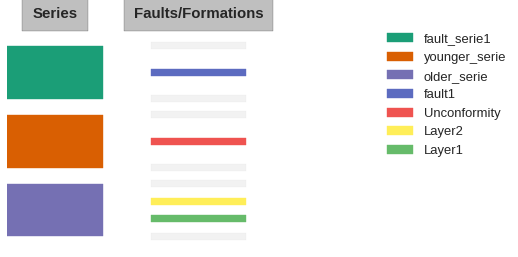

In [7]:
%matplotlib inline
gp.set_series(geo_data, {'fault_serie1': 'fault1','younger_serie' : 'Unconformity', 'older_serie': ('Layer1', 'Layer2')},
              order_formations= ['fault1', 'Unconformity', 'Layer2', 'Layer1'], verbose=2)

geo_data.modify_interface(9, Z = -6.4)

fig=plt.gcf()
# fig.savefig('doc/figs/fault_pile.pdf')

The next cell show how specific series can be selected

In [5]:
#geo_data = gp.select_series(geo_data, ['older_serie'])

Visualizing the final data

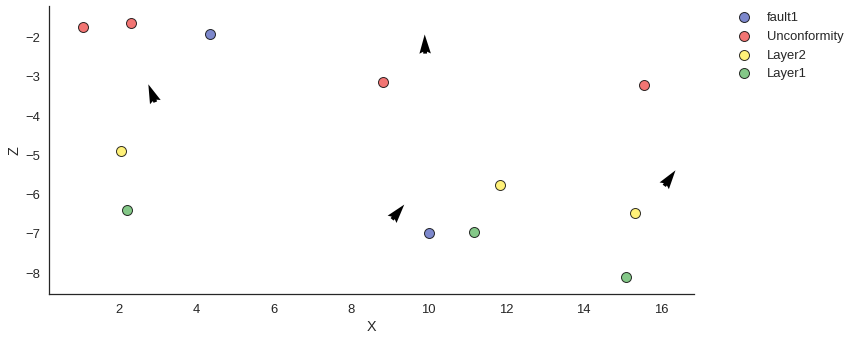

In [8]:
gp.plot_data(geo_data)

In [9]:
gp.get_data(geo_data, 'interfaces')

,X,Y,Z,formation,series
0,4.34515,5,-1.92156,fault1,fault_serie1
1,10,4,-7,fault1,fault_serie1
2,2.30302,5,-1.64725,Unconformity,younger_serie
3,1.08384,5,-1.73869,Unconformity,younger_serie
4,8.82565,5,-3.14075,Unconformity,younger_serie
5,15.5616,5,-3.23218,Unconformity,younger_serie
6,2.05919,5,-4.90856,Layer2,older_serie
7,11.8431,5,-5.76199,Layer2,older_serie
8,15.3178,5,-6.4935,Layer2,older_serie
9,2.21158,5,-6.4,Layer1,older_serie


Compiling the theano funciton

In [10]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1,0,1], dtype='float64', verbose=[], compile_theano=True)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64


Computing the model

In [9]:
lith, fault = gp.compute_model(interp_data)

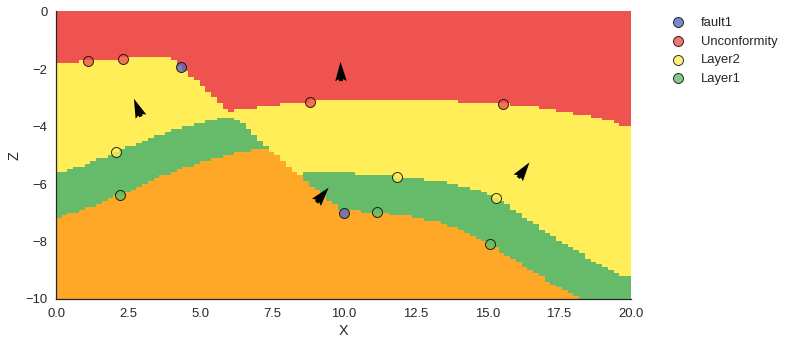

In [10]:
# Plotting
gp.plot_section(geo_data, lith[0], 5, plot_data=True)

# plt.savefig("model_2.pdf")

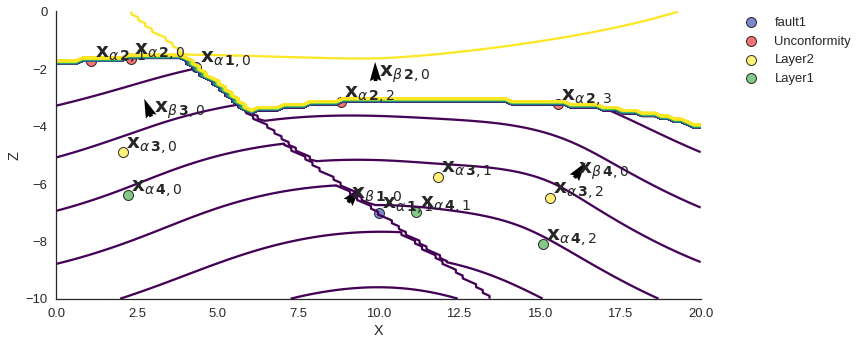

In [11]:
gp.plot_scalar_field(geo_data, lith[1], 5, cmap="viridis", N = 500)
annotate_plot(gp.get_data(geo_data, verbosity=2), 'annotations', 'X', 'Z', size = 20)

# plt.savefig("doc/figs/scalar_field_simple.pdf")

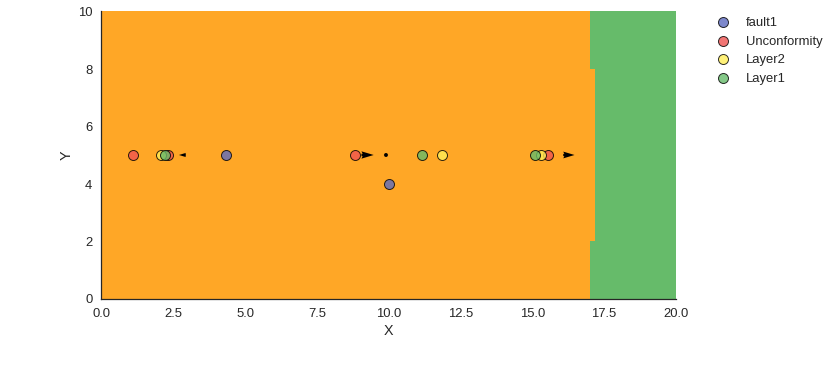

In [12]:
gp.plot_section(geo_data, lith[0], 5, direction='z',plot_data=True)
annotate_plot(gp.get_data(geo_data, verbosity=2), 'annotations', 'X', 'Z', size = 20)

#plt.savefig('doc/figs/FaultBlock.png')

In 3D using vtk:

In [21]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith[1],
                               [fault[1]],
                               original_scale=True)

In [22]:
gp.plot_surfaces_3D(geo_data, ver_s, sim_s)

## Topology

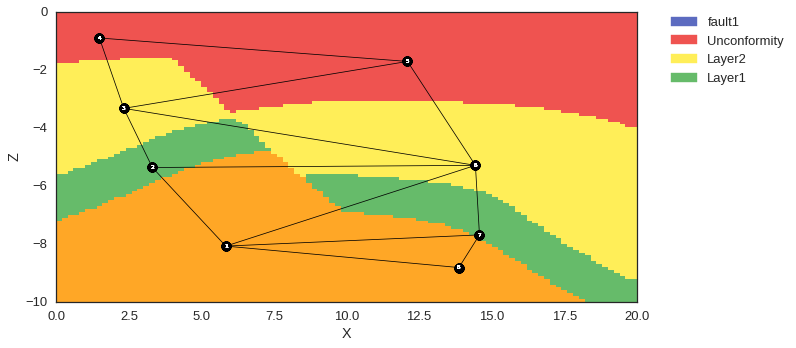

In [14]:
G, centroids, labels_unique, lith_to_labels_lot, labels_to_lith_lot = gp.topology_compute(geo_data, lith[0], fault[0])
gp.plot_section(geo_data, lith[0], 5)
gp.topology_plot(geo_data, G, centroids)

# plt.savefig('doc/figs/topology.png')

The following code is simply to change the color of the layers for giving consistency in the publication

In [103]:
import copy
a = copy.copy(lith[0])

In [135]:
# plot 1
a[lith[0]==0]=0
a[lith[0]==1]=2
a[lith[0]==2]=3
a[lith[0]==3]=4